In [ ]:
Explainability is a way of saying why the model what he does, saying it throuhght the variables importance available on the dataset.
SHAP is one of the algorithms used for model explainability.

This notebook aims to provide my understanding how this algorithm works and how to use it.

Reference: https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

SHAP values (SHapley Additive exPlanations): it is based on the game theory and it is used to provide transparency and interpretability to a ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
plt.style.use('default')

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
from scipy.special import softmax

In [4]:
import shap

In [7]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame = True)
# Gets the independent variables
X = dataset['data']
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# Gets the dependent variable (the target)
y = dataset['target']
y.head(5)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
def print_feature_importances_random_forest(random_forest_model):
    
    '''
    Prints the feature importances of a Random Forest model in an ordered way.
    random_forest_model -> The sklearn.ensemble.RandomForestRegressor or RandomForestClassifier trained model
    '''
    
    # Fetch the feature importances and feature names
    importances = random_forest_model.feature_importances_
    features = random_forest_model.feature_names_in_
    
    # Organize them in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

In [ ]:
print_feature_importances_random_forest(model)


In [16]:
explainer = shap.Explainer(model.predict, X_test)

In [17]:
shap_values = explainer(X_test)

Exact explainer: 4129it [24:15,  2.83it/s]                                                                              


In [25]:
# shap_values hold three values: 
#.values -> the data 

# 
shap_values.values[0]

array([ 1.70257073e-01, -7.36278887e-02, -4.24609440e-02, -4.08481488e-05,
       -1.91804287e-02, -2.96947457e-01,  2.00670748e-01, -5.21805562e-01])

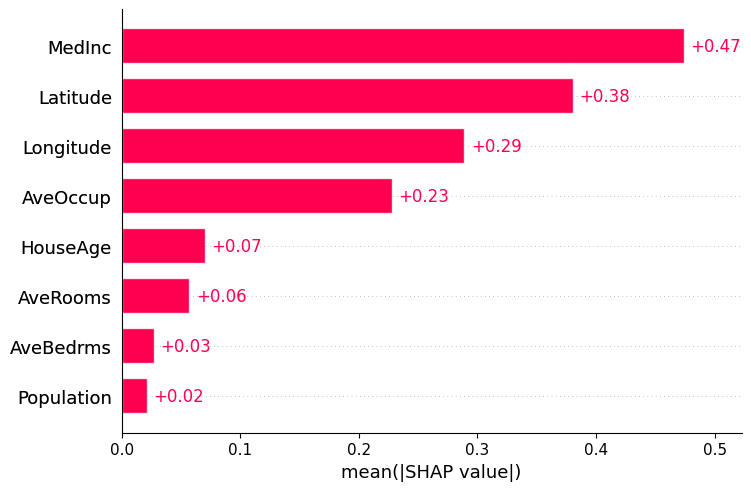

In [19]:
shap.plots.bar(shap_values)

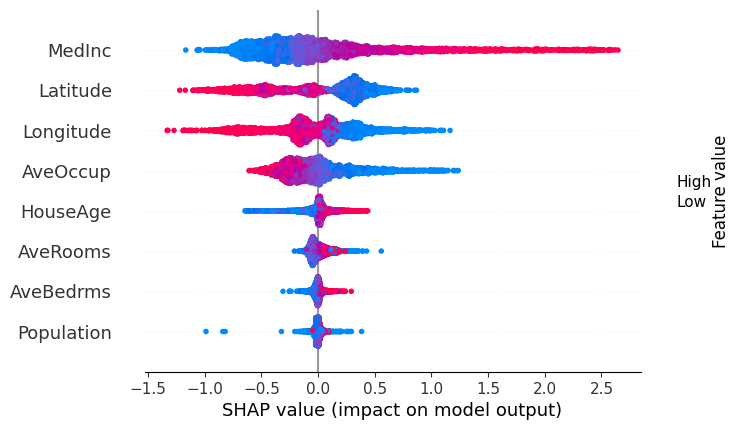

In [23]:
shap.plots.beeswarm(shap_values)